In [9]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

In [10]:
# with open('spectrum.txt') as f:
#     lines = f.readlines()[1:]
    
#     freqs = [float(item.split('\t')[0]) for item in lines]
#     db_levels = [float(item.strip().split('\t')[1]) for item in lines]

In [11]:
explosao_sala_centro = '../audio/lab1/explosao_sala_centro.wav'
explosao_sala_fundo  = '../audio/lab1/explosao_sala_fundo.wav'

explosao_rampa_centro = '../audio/lab1/explosao_rampa_centro.wav'
explosao_rampa_fundo  = '../audio/lab1/explosao_rampa_fundo.wav'

In [12]:
wav_esc, sr_esc = sf.read(explosao_sala_centro)
wav_esf, sr_esf = sf.read(explosao_sala_fundo)

wav_erc, sr_erc = sf.read(explosao_rampa_centro)
wav_erf, sr_erf = sf.read(explosao_rampa_fundo)

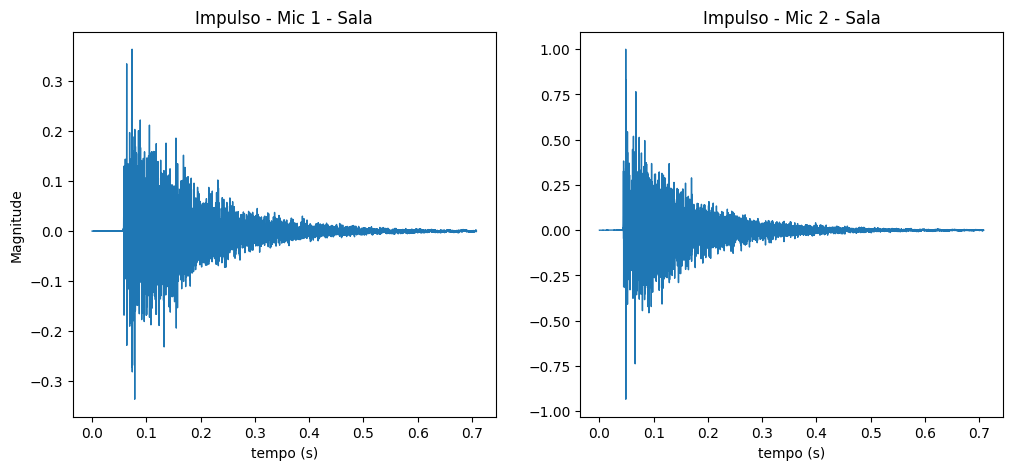

In [116]:
x = np.arange(len(wav_esc)) / sr_esc

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(x, wav_esc, linewidth=1);
plt.title('Impulso - Mic 1 - Sala')
plt.xlabel('tempo (s)')
plt.ylabel('Magnitude')

plt.subplot(122)
plt.plot(x, wav_esf, linewidth=1);
plt.title('Impulso - Mic 2 - Sala')
plt.xlabel('tempo (s)')
plt.show()

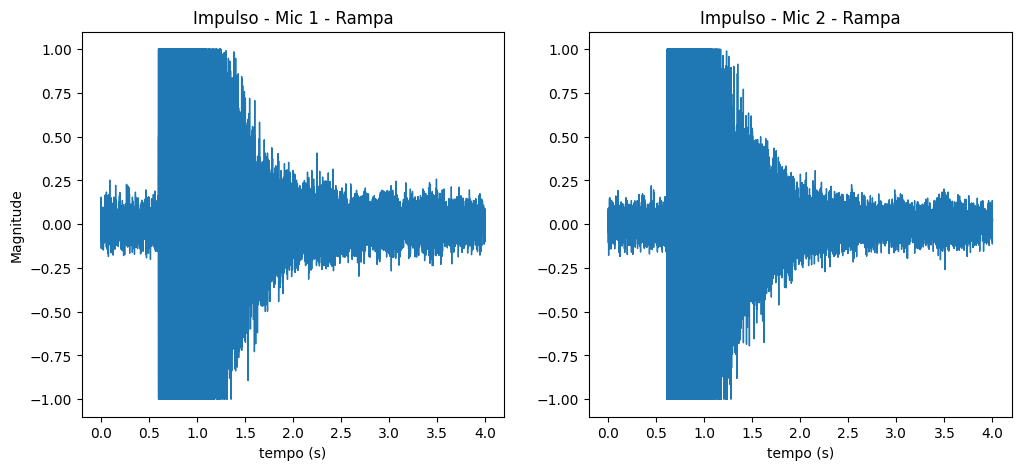

In [115]:
wav_erc = wav_erc[:4*sr_erc]
wav_erf = wav_erf[:4*sr_erf]

x = np.arange(len(wav_erc)) / sr_erc

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(x, wav_erc, linewidth=1);
plt.title('Impulso - Mic 1 - Rampa')
plt.xlabel('tempo (s)')
plt.ylabel('Magnitude')

plt.subplot(122)
plt.plot(x, wav_erf, linewidth=1);
plt.title('Impulso - Mic 2 - Rampa')
plt.xlabel('tempo (s)')
plt.show()

In [15]:
def calc_fft(wav, sr, db=True):
    num_samples = len(wav)
    duration = num_samples / sr
    time = np.linspace(0., duration, num_samples)
    fft_result = np.fft.fft(wav)
    freq_bins = np.fft.fftfreq(num_samples, d=1/sr)
    magnitudes = np.abs(fft_result)
    magnitudes_db = 20 * np.log10(magnitudes)

    if db:
        return freq_bins, magnitudes_db
    else:
        return freq_bins, magnitudes

In [20]:
def plot_fft(freq_bins_1, magnitudes_db_1, freq_bins_2, magnitudes_db_2, titulo1, titulo2, db=True):
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(freq_bins_1, magnitudes_db_1)
    plt.xlabel('Frequencia (Hz)')
    if db:
        plt.ylabel('Magnitude (db)')
    else:
        plt.ylabel('Magnitude')    
    plt.title(titulo1)
    plt.xlim(0)
    plt.subplot(122)
    plt.plot(freq_bins_2, magnitudes_db_2)
    plt.xlabel('Frequencia (Hz)')
    if db:
        plt.ylabel('Magnitude (db)')
    else:
        plt.ylabel('Magnitude')
    plt.title(titulo2)
    plt.xlim(0)
    plt.show()

In [30]:
freq_bins_esc, magnitudes_esc_db = calc_fft(wav_esc, sr_esc)
freq_bins_esf, magnitudes_esf_db = calc_fft(wav_esf, sr_esf)
freq_bins_erc, magnitudes_erc_db = calc_fft(wav_erc, sr_erc)
freq_bins_erf, magnitudes_erf_db = calc_fft(wav_erf, sr_erf)

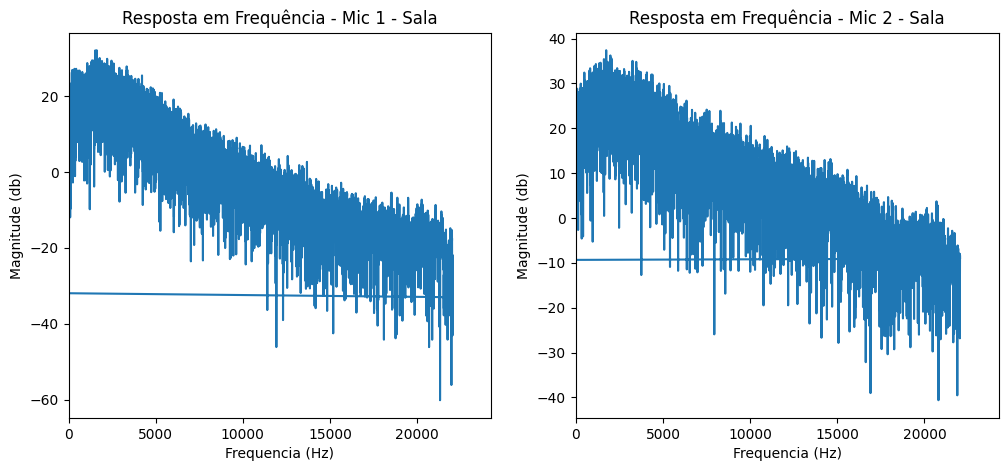

In [31]:
plot_fft(freq_bins_esc, magnitudes_esc_db, freq_bins_esf, magnitudes_esf_db, 'Resposta em Frequência - Mic 1 - Sala', 'Resposta em Frequência - Mic 2 - Sala')

In [26]:
freq_bins_esc, magnitudes_esc_db = calc_fft(wav_esc, sr_esc, False)
freq_bins_esf, magnitudes_esf_db = calc_fft(wav_esf, sr_esf, False)
freq_bins_erc, magnitudes_erc_db = calc_fft(wav_erc, sr_erc, False)
freq_bins_erf, magnitudes_erf_db = calc_fft(wav_erf, sr_erf, False)

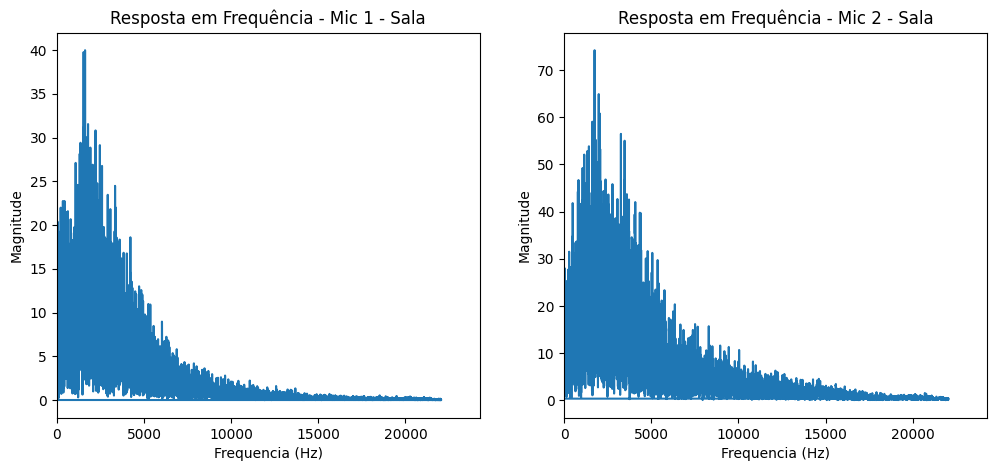

In [27]:
plot_fft(freq_bins_esc, magnitudes_esc_db, freq_bins_esf, magnitudes_esf_db, 'Resposta em Frequência - Mic 1 - Sala', 'Resposta em Frequência - Mic 2 - Sala', False)

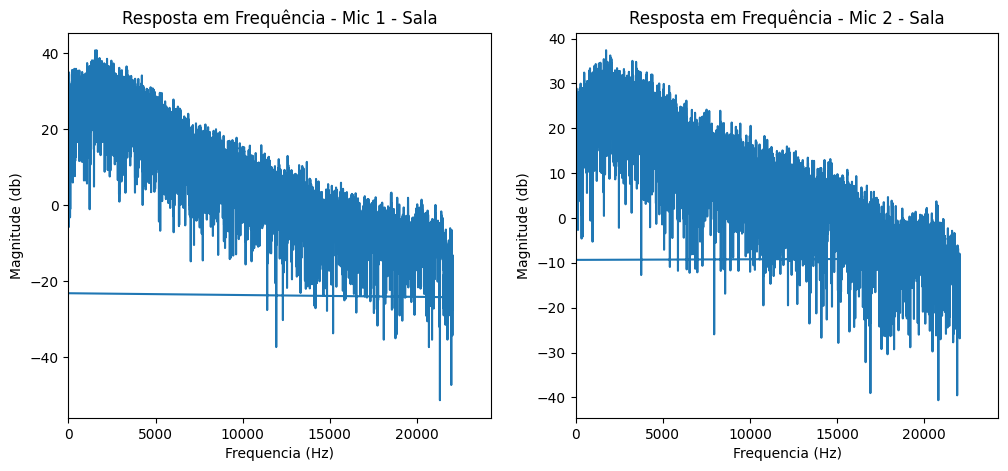

In [40]:
plot_fft(freq_bins_esc, magnitudes_esc_db, freq_bins_esf, magnitudes_esf_db, 'Resposta em Frequência - Mic 1 - Sala', 'Resposta em Frequência - Mic 2 - Sala')

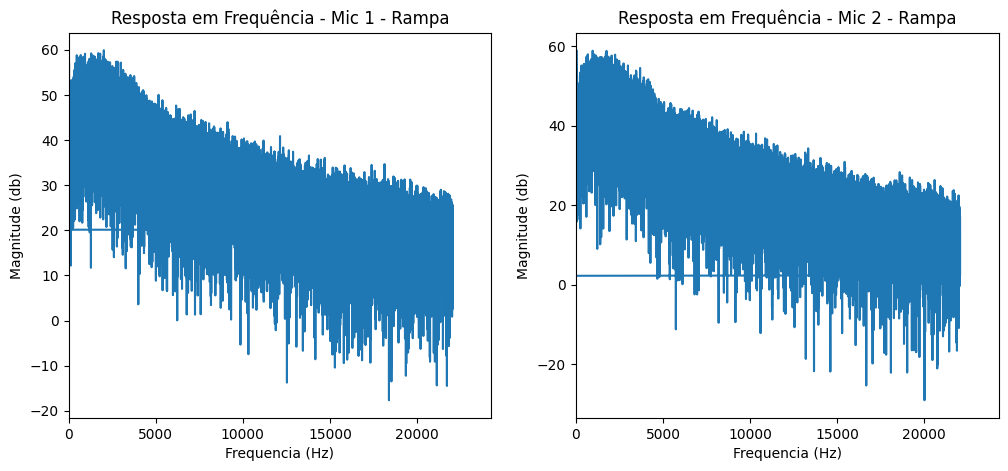

In [41]:
plot_fft(freq_bins_erc, magnitudes_erc_db, freq_bins_erf, magnitudes_erf_db, 'Resposta em Frequência - Mic 1 - Rampa', 'Resposta em Frequência - Mic 2 - Rampa')

In [34]:
# sweep_sala_centro = '../audio/lab1/sweep_sala_centro.wav'
# sweep_sala_fundo  = '../audio/lab1/sweep_sala_fundo.wav'

sweep_rampa_centro = '../audio/lab1/sweep_rampa_centro.wav'
sweep_rampa_fundo   = '../audio/lab1/sweep_rampa_fundo.wav'

# wav_ssc, sr_ssc = sf.read(sweep_sala_centro)
# wav_ssf, sr_ssf = sf.read(sweep_sala_fundo)

wav_src, sr_src = sf.read(sweep_rampa_centro)
wav_srf, sr_srf = sf.read(sweep_rampa_fundo)

In [53]:
freq_bins_src, magnitudes_src_db = calc_fft(wav_src, sr_src,False)

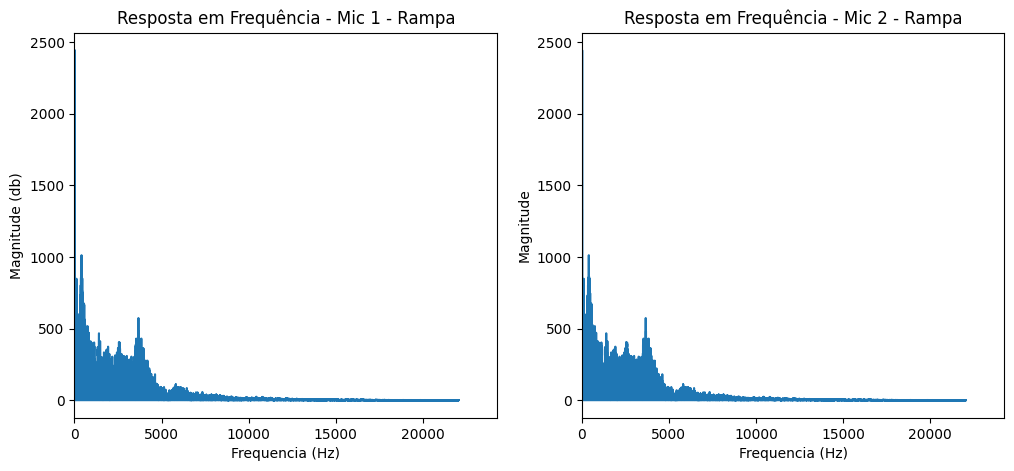

In [54]:
plot_fft(freq_bins_src, magnitudes_src_db, freq_bins_src, magnitudes_src_db, 'Resposta em Frequência - Mic 1 - Rampa', 'Resposta em Frequência - Mic 2 - Rampa', False)

In [36]:
def get_ifft(wav, sr):
    num_samples = len(wav)
    duration = num_samples / sr
    time = np.linspace(0., duration, num_samples)
    fft_result = np.fft.fft(wav)
    ifft = np.fft.ifft(fft_result)
    freq_bins = np.fft.fftfreq(num_samples, d=1/sr)
    magnitudes = np.abs(fft_result)
    magnitudes_db = 20 * np.log10(magnitudes)

    return time, ifft

In [37]:
t, y = get_ifft(wav_src, sr_src)

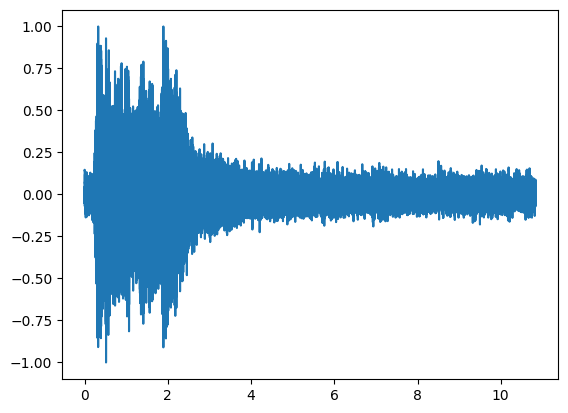

In [40]:
plt.plot(t,np.real(y));


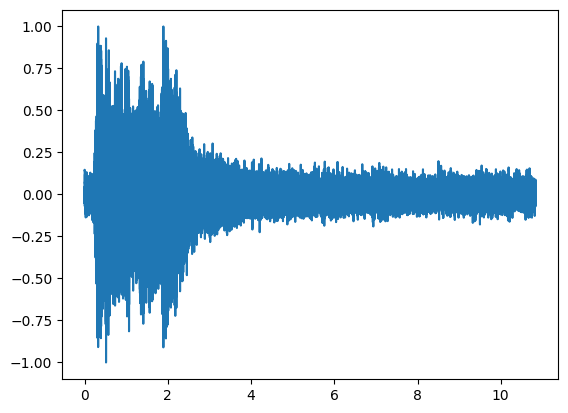

In [41]:
plt.plot(t,wav_src);


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


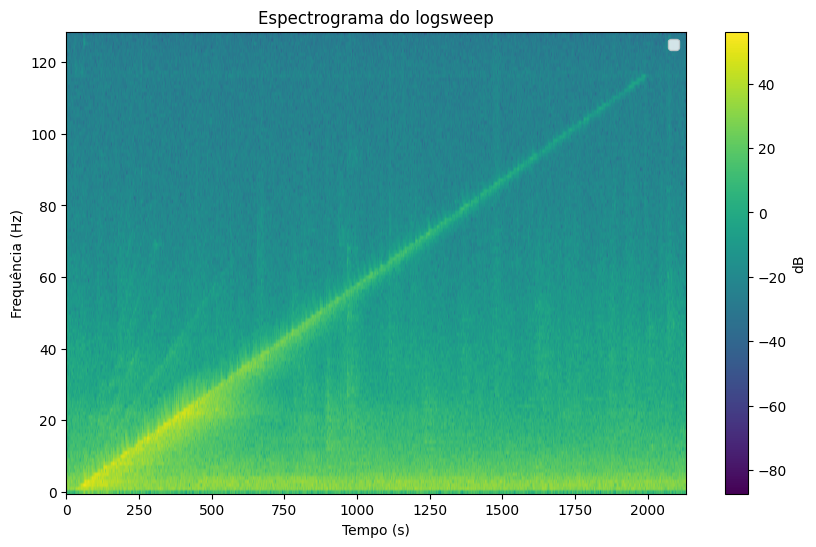

In [108]:
import numpy as np
import scipy.signal as sg
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Carregar o arquivo de áudio do logsweep
fs, logsweep = wavfile.read('../audio/lab1/sweep_rampa_fundo.wav')  # Substitua "logsweep_audio.wav" pelo nome do seu arquivo de áudio

# Realizar a Transformada de Fourier de curto prazo (STFT)
frequencies, times, spectrogram = sg.spectrogram(logsweep, fs=fs)

# Localizar a varredura de frequência no espectrograma
# No caso de um logsweep, a varredura aparece como uma linha reta, então basta encontrar o pico dominante no espectrograma.
frequency_index = np.argmax(np.max(spectrogram, axis=1))

# Inverter a varredura de frequência
inverse_spectrogram = np.zeros_like(spectrogram)
inverse_spectrogram[frequency_index] = spectrogram[frequency_index]

# Aplicar a IFFT para obter o áudio de volta ao domínio do tempo
inverse_logsweep2 = sg.istft(inverse_spectrogram, fs=fs)

# Salvar o áudio invertido em um novo arquivo
# wavfile.write("inverse_logsweep_audio.wav", fs, inverse_logsweep.astype(np.int16))  # Substitua "inverse_logsweep_audio.wav" pelo nome do arquivo de saída desejado

# Plotar o espectrograma para verificar a varredura
plt.figure(figsize=(10, 6))
plt.imshow(10 * np.log10(spectrogram), aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='dB')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência (Hz)')
plt.title('Espectrograma do logsweep')
# plt.axhline(y=frequencies[frequency_index], color='red', linestyle='--', label='Varredura')
plt.legend()
plt.show()




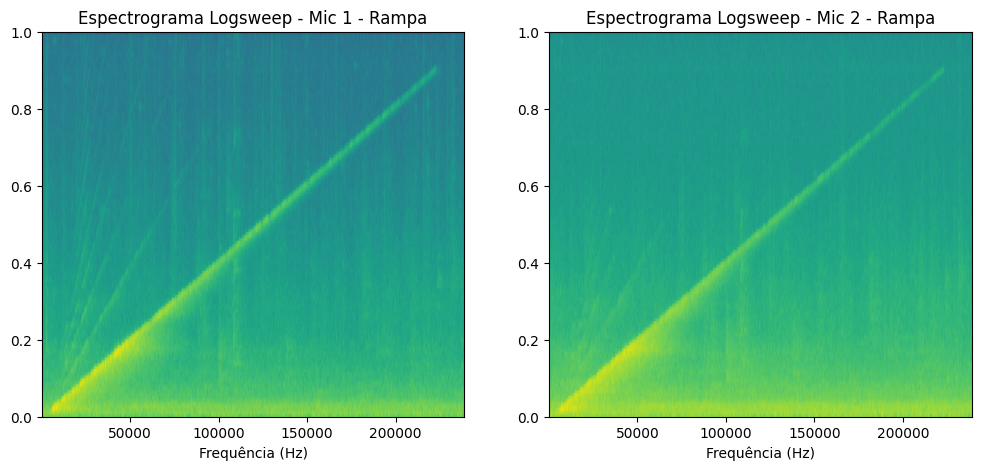

In [109]:
fs, logsweep = wavfile.read('../audio/lab1/sweep_rampa_centro.wav')  # Substitua "logsweep_audio.wav" pelo nome do seu arquivo de áudio
# logsweep=logsweep[:int(len(logsweep)/4)]

fs, logsweep2 = wavfile.read('../audio/lab1/sweep_rampa_fundo.wav')  # Substitua "logsweep_audio.wav" pelo nome do seu arquivo de áudio


plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.specgram(logsweep)
plt.title('Espectrograma Logsweep - Mic 1 - Rampa')
plt.xlabel('Frequência (Hz)')

plt.subplot(122)
plt.specgram(logsweep2)
plt.title('Espectrograma Logsweep - Mic 2 - Rampa')
plt.xlabel('Frequência (Hz)')
plt.show()

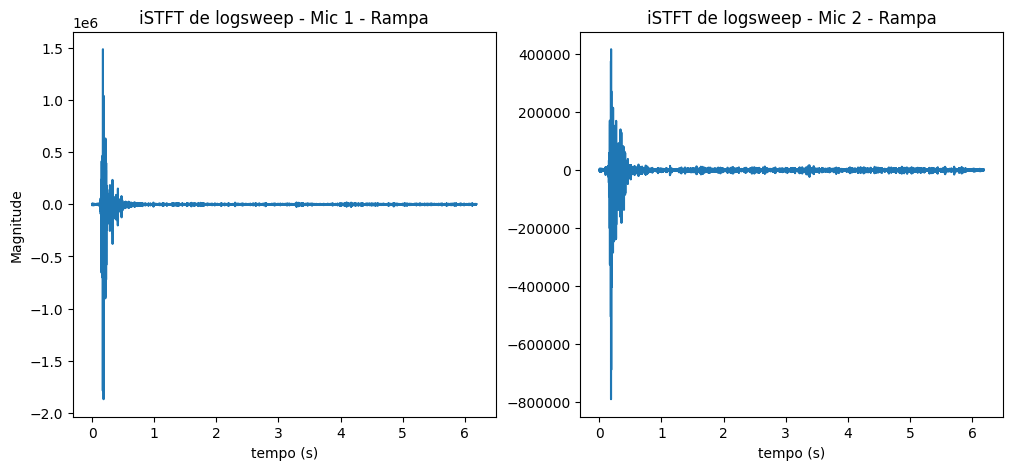

In [53]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(inverse_logsweep[0], inverse_logsweep[1])
plt.title('iSTFT de logsweep - Mic 1 - Rampa')
plt.xlabel('tempo (s)')
plt.ylabel('Magnitude')

plt.subplot(122)
plt.plot(inverse_logsweep2[0], inverse_logsweep2[1])
plt.title('iSTFT de logsweep - Mic 2 - Rampa')
plt.xlabel('tempo (s)')
# plt.ylabel('Magnitude')
plt.show()


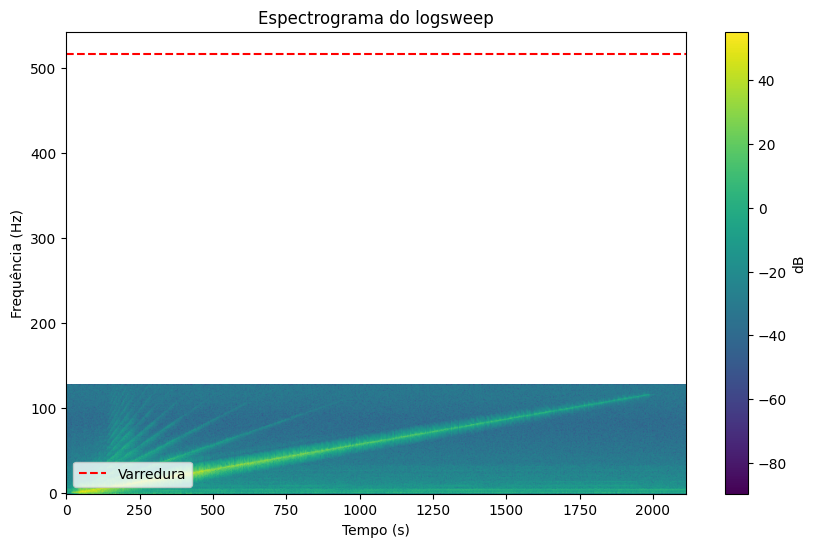

In [111]:
import numpy as np
import scipy.signal as sg
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Carregar o arquivo de áudio do logsweep
fs, logsweep = wavfile.read('../audio/lab1/sweep_sala_fundo.wav')  # Substitua "logsweep_audio.wav" pelo nome do seu arquivo de áudio
# logsweep=logsweep[:int(len(logsweep)/4)]
# Realizar a Transformada de Fourier de curto prazo (STFT)
frequencies, times, spectrogram = sg.spectrogram(logsweep, fs=fs)

# Localizar a varredura de frequência no espectrograma
# No caso de um logsweep, a varredura aparece como uma linha reta, então basta encontrar o pico dominante no espectrograma.
frequency_index = np.argmax(np.max(spectrogram, axis=1))

# Inverter a varredura de frequência
inverse_spectrogram = np.zeros_like(spectrogram)
inverse_spectrogram[frequency_index] = spectrogram[frequency_index]

# Aplicar a IFFT para obter o áudio de volta ao domínio do tempo
inverse_logsweep2 = sg.istft(inverse_spectrogram, fs=fs)

# Salvar o áudio invertido em um novo arquivo
# wavfile.write("inverse_logsweep_audio.wav", fs, inverse_logsweep.astype(np.int16))  # Substitua "inverse_logsweep_audio.wav" pelo nome do arquivo de saída desejado

# Plotar o espectrograma para verificar a varredura
plt.figure(figsize=(10, 6))
plt.imshow(10 * np.log10(spectrogram), aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='dB')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência (Hz)')
plt.title('Espectrograma do logsweep')
plt.axhline(y=frequencies[frequency_index], color='red', linestyle='--', label='Varredura')
plt.legend()
plt.show()




In [63]:
inverse_logsweep

(array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
        1.07422902e+01, 1.07423129e+01, 1.07423356e+01]),
 array([], shape=(473738, 0), dtype=float32))

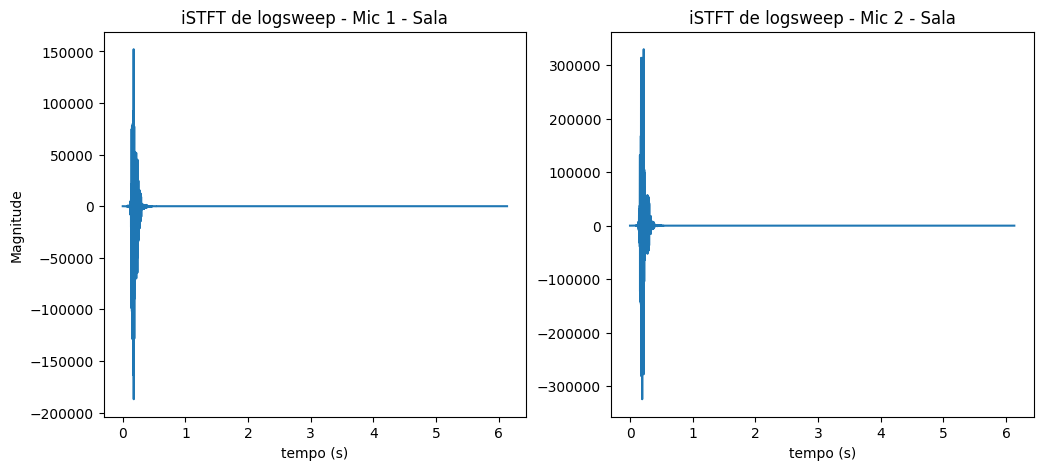

In [112]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(inverse_logsweep[0], inverse_logsweep[1])
plt.title('iSTFT de logsweep - Mic 1 - Sala')
plt.xlabel('tempo (s)')
plt.ylabel('Magnitude')

plt.subplot(122)
plt.plot(inverse_logsweep2[0], inverse_logsweep2[1])
plt.title('iSTFT de logsweep - Mic 2 - Sala')
plt.xlabel('tempo (s)')
# plt.ylabel('Magnitude')
plt.show()


In [95]:
logsweep.shape

(118434, 2)

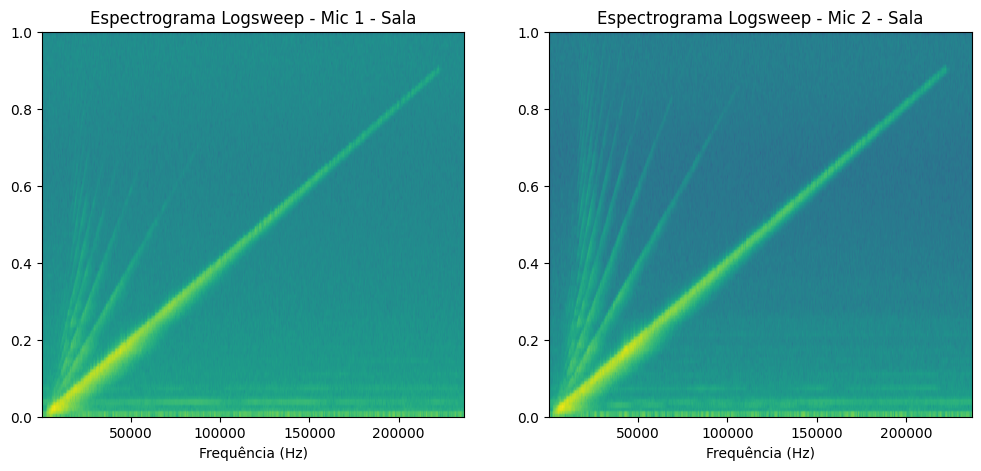

In [103]:
fs, logsweep = wavfile.read('../audio/lab1/sweep_sala_centro.wav')  # Substitua "logsweep_audio.wav" pelo nome do seu arquivo de áudio
# logsweep=logsweep[:int(len(logsweep)/4)]

fs, logsweep2 = wavfile.read('../audio/lab1/sweep_sala_fundo.wav')  # Substitua "logsweep_audio.wav" pelo nome do seu arquivo de áudio


plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.specgram(logsweep)
plt.title('Espectrograma Logsweep - Mic 1 - Sala')
plt.xlabel('Frequência (Hz)')

plt.subplot(122)
plt.specgram(logsweep2)
plt.title('Espectrograma Logsweep - Mic 2 - Sala')
plt.xlabel('Frequência (Hz)')
plt.show()

In [98]:
fs, logsweep = wavfile.read('../audio/lab1/sweep_sala_centro.wav')

In [99]:
logsweep.shape

(473738, 2)